# EDA - Exploratory Data Analysis   
- Distribution of the target variable (days_in_shelter)
- Exploring and visualizing the other features distributions
- Computing the correlation between target variable and the other variables

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
from From_Shelter_to_Love.data_provisoria_v2 import get_data

In [3]:
#Getting the data

df = get_data()
df.head(2)

,Animal ID,Intake Type,Intake Condition,Animal Type,Breed,Date of Birth,Outcome Type,days_in_shelter,age_upon_intake_months,age_upon_intake_years,age_upon_outcome_months,age_upon_outcome_years,neutered_or_spayed_outcome,male_or_female_outcome,neutered_or_spayed_intake,male_or_female_intake,color
0,A006100,Public Assist,Normal,Dog,Mixed,2007-07-09,Return to Owner,2.0,72.0,6.0,72.0,6.0,1,1.0,1,1.0,Bicolor
1,A047759,Owner Surrender,Normal,Dog,Pure,2004-04-02,Transfer,5.0,120.0,10.0,120.0,10.0,1,1.0,1,1.0,Tricolor


In [4]:
df.drop(columns = ['Animal ID','age_upon_outcome_years','age_upon_intake_years','Outcome Type', 'age_upon_outcome_months','male_or_female_outcome','neutered_or_spayed_outcome'], inplace = True)

## Exploring target variable (days_in_shelter)   
- Compute simple statistics for the target variable (min, max, mean, std, etc)
- Plot distributions

In [81]:
df.days_in_shelter.describe()

count    102725.000000
mean         19.717089
std          42.652623
min           1.000000
25%           3.000000
50%           6.000000
75%          18.000000
max        1522.000000
Name: days_in_shelter, dtype: float64

In [82]:
(df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

male_or_female_intake        4.066196
age_upon_intake_months       0.002920
Intake Type                  0.000000
Intake Condition             0.000000
Animal Type                  0.000000
Breed                        0.000000
days_in_shelter              0.000000
neutered_or_spayed_intake    0.000000
color                        0.000000
dtype: float64

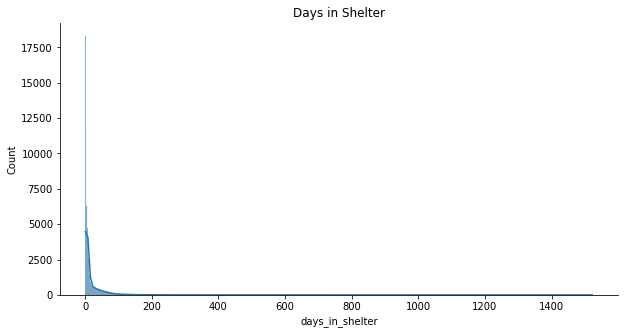

In [83]:
def plot_dist(series=df["days_in_shelter"], title="Days in Shelter"):
    fig, axs = plt.subplots(figsize = [10,5])
    sns.histplot(series, kde=True, discrete=True, ax = axs)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

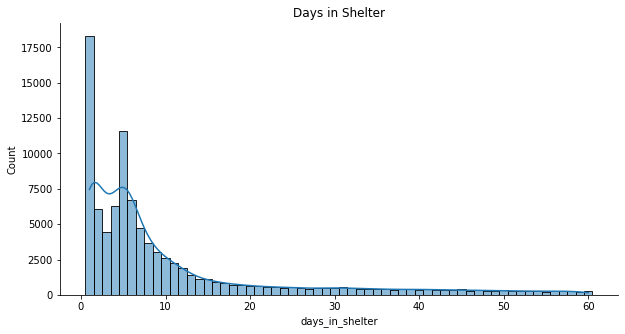

In [84]:
# drop absurd values 
plot_dist(df[df.days_in_shelter.between(0, 60)]['days_in_shelter'])

In [85]:
df[df.days_in_shelter > 10].shape

(35220, 9)

In [86]:
#Let's visualize our target in bins

def bins(df, column):
    bins = []
    for row in df[column]:
        if row in range(0,16):
            bins.append('[0,15]')
        elif row in range(16,31):
            bins.append('[16,30]')
        elif row in range(31,61):
            bins.append('[31,60]')
        else:
            bins.append('[+60]')
    return bins

df['day_bins'] = bins(df,'days_in_shelter')

In [87]:
df.head(2)

,Intake Type,Intake Condition,Animal Type,Breed,days_in_shelter,age_upon_intake_months,neutered_or_spayed_intake,male_or_female_intake,color,day_bins
0,Public Assist,Normal,Dog,Mixed,2.0,72.0,1,1.0,Bicolor,"[0,15]"
1,Owner Surrender,Normal,Dog,Pure,5.0,120.0,1,1.0,Tricolor,"[0,15]"


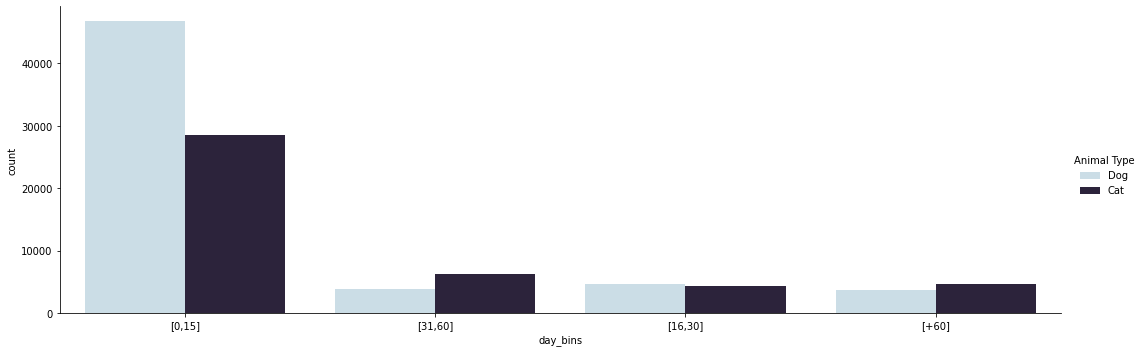

In [88]:
sns.catplot(x="day_bins", kind="count", palette = "ch:s=.25,rot=-.25", data=df, height=5, aspect=3, hue = 'Animal Type');
plt.show()

## Exploring other features   
Exploring categorical features and numerical features and how they relate with target

### Categorical features   
Categorical features in dataset:   
- Intake Type
- Intake Condition
- Animal Type
- Breed (too many breed, how to plot them visually?)
- Outcome Type
- Colors (too many colors, how to plot them visually?)   
- neutered_or_spayed_intake
- male_or_female_intake
- neutered_or_spayed_intake
- male_or_female_outcome
- neutered_or_spayed_outcome
   
(Missing some features (work in get_data))

#### Intake Type

In [89]:
df['Intake Type'].describe()

count     102725
unique         5
top        Stray
freq       79318
Name: Intake Type, dtype: object

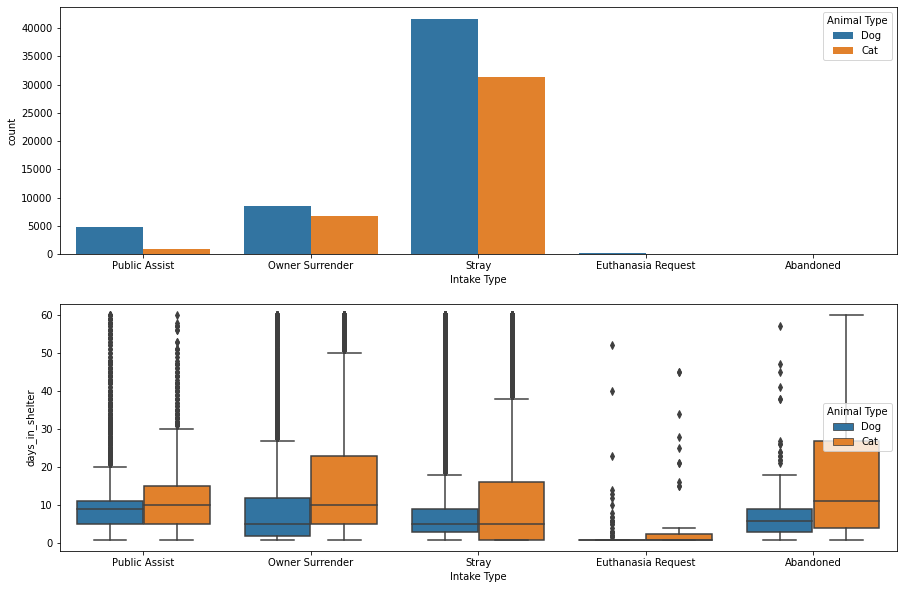

In [90]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Intake Type", data=df[df.days_in_shelter.between(0,60)],\
              ax = axs[0],  hue = 'Animal Type');

sns.boxplot(x="Intake Type", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)],\
            ax = axs[1],  hue = 'Animal Type');

#### Intake Condition

In [91]:
df['Intake Condition'].describe()

count     102725
unique        10
top       Normal
freq       90036
Name: Intake Condition, dtype: object

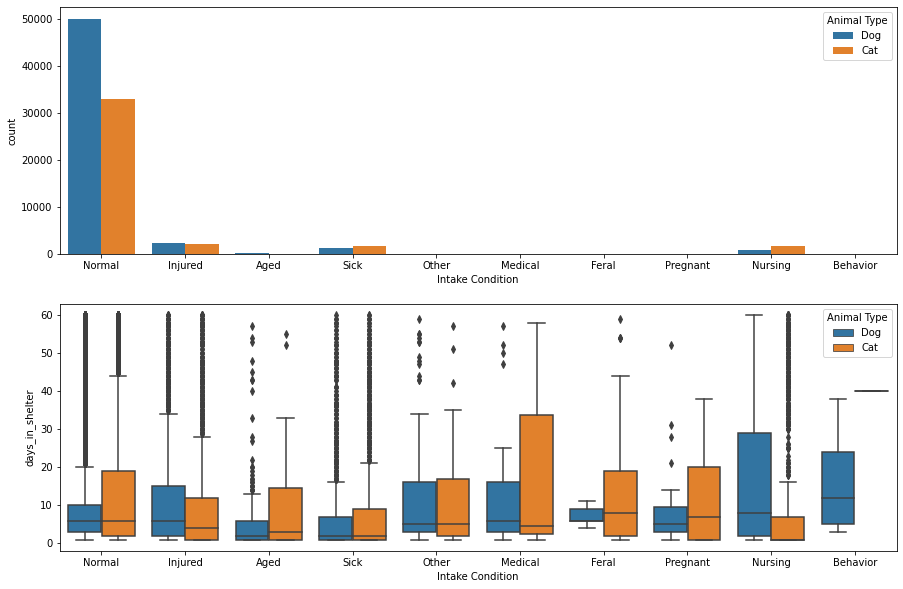

In [92]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Intake Condition", data=df[df.days_in_shelter.between(0,60)],\
              ax = axs[0],  hue = 'Animal Type');

sns.boxplot(x="Intake Condition", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)],\
            ax = axs[1],  hue = 'Animal Type');

#### Animal Type

In [93]:
df['Animal Type'].describe()

count     102725
unique         2
top          Dog
freq       58881
Name: Animal Type, dtype: object

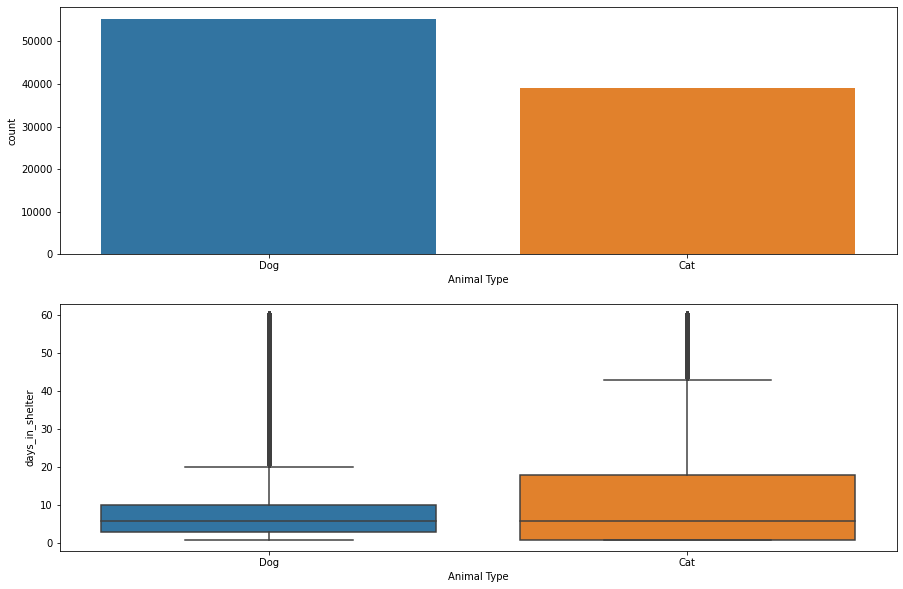

In [94]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Animal Type", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

sns.boxplot(x="Animal Type", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

#### Breed

In [95]:
df.Breed.unique()

array(['Mixed', 'Pure'], dtype=object)

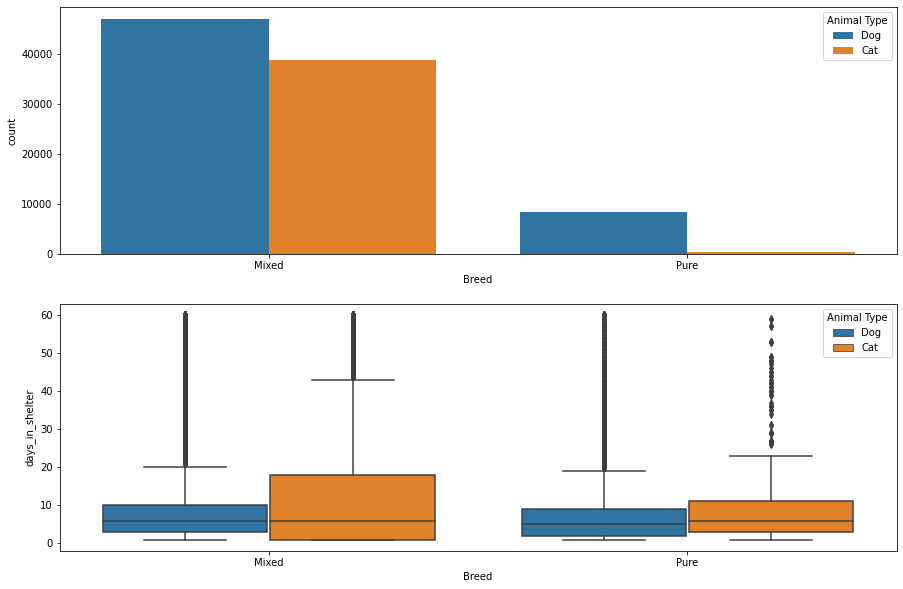

In [96]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="Breed", data=df[df.days_in_shelter.between(0,60)],\
              ax = axs[0], hue = 'Animal Type');

sns.boxplot(x="Breed", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)],\
            ax = axs[1], hue = 'Animal Type');

#### Colors

In [97]:
df.color.unique()

array(['Bicolor', 'Tricolor', 'Dark', 'Light'], dtype=object)

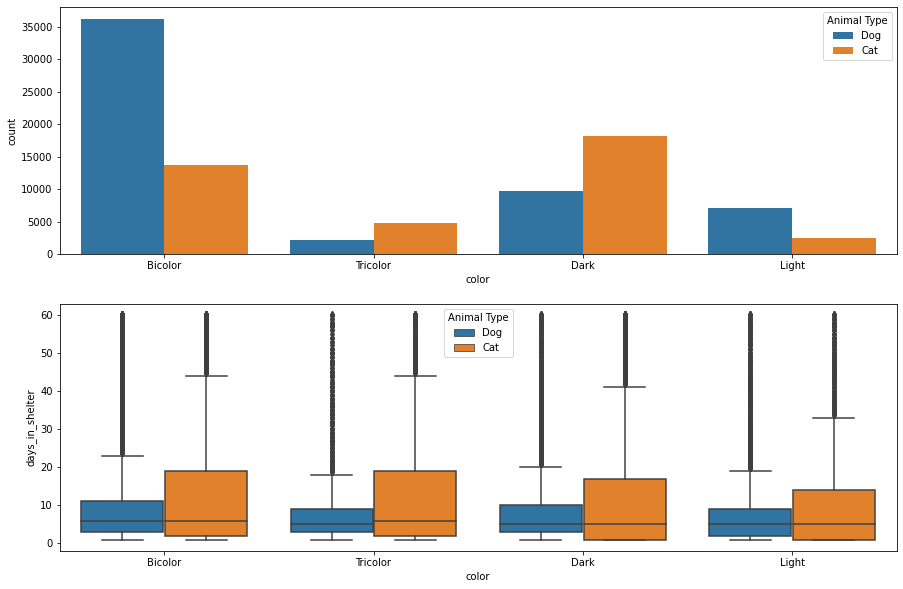

In [98]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="color", data=df[df.days_in_shelter.between(0,60)],\
              ax = axs[0], hue = 'Animal Type');

sns.boxplot(x="color", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)],\
            ax = axs[1], hue = 'Animal Type');

#### Neutered or not in Intake

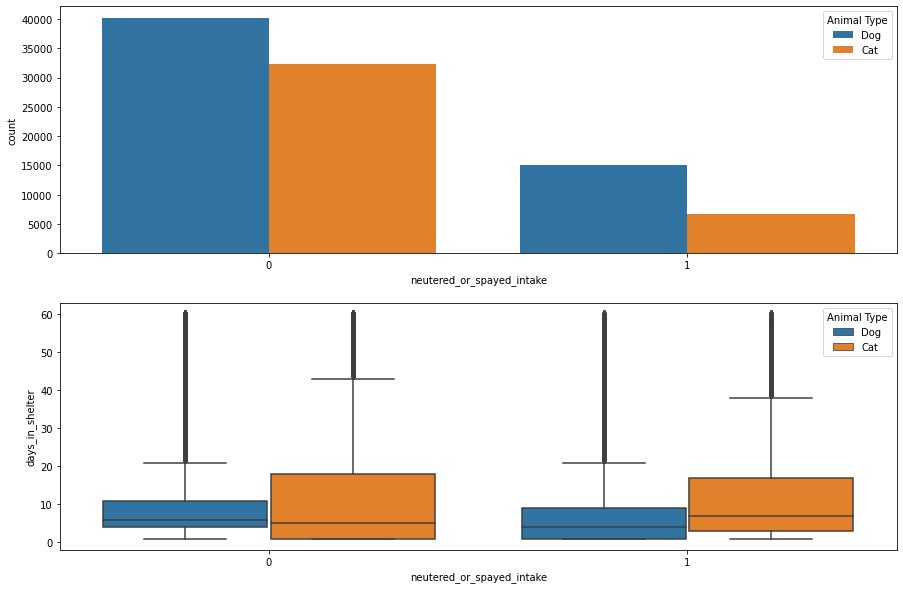

In [99]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="neutered_or_spayed_intake", data=df[df.days_in_shelter.between(0,60)],\
              ax = axs[0],  hue = 'Animal Type');

sns.boxplot(x="neutered_or_spayed_intake", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)],\
            ax = axs[1],  hue = 'Animal Type');

### Male or Female

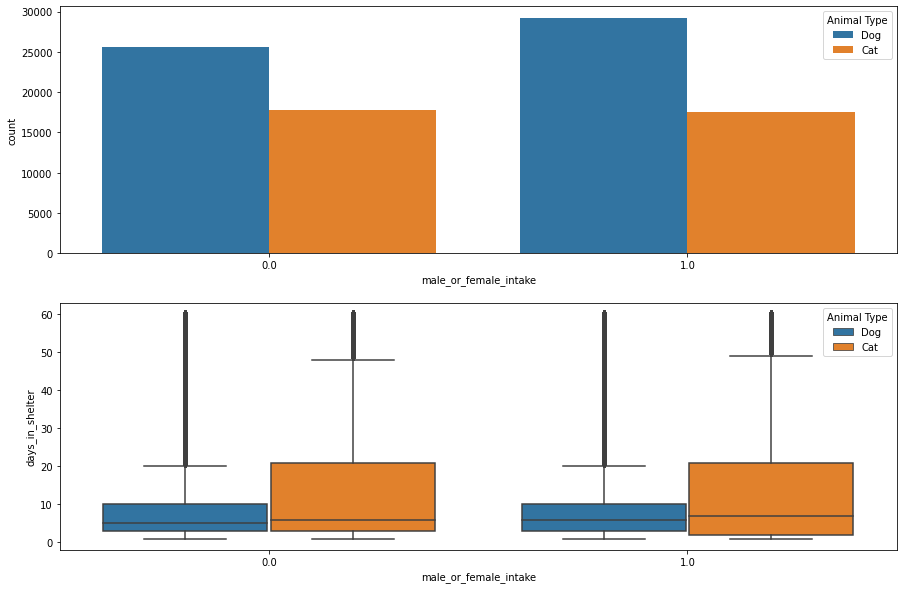

In [100]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.countplot(x="male_or_female_intake", data=df[df.days_in_shelter.between(0,60)],\
              ax = axs[0],  hue = 'Animal Type');

sns.boxplot(x="male_or_female_intake", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)],\
            ax = axs[1],  hue = 'Animal Type');

#### Outcome Type

In [101]:
# fig, axs = plt.subplots(2, 1, figsize=(15,10))

# sns.countplot(x="Outcome Type", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

# sns.boxplot(x="Outcome Type", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

#### Neutered or not in Outcome

In [102]:
# fig, axs = plt.subplots(2, 1, figsize=(15,10))

# sns.countplot(x="neutered_or_spayed_outcome", data=df[df.days_in_shelter.between(0,60)], ax = axs[0]);

# sns.boxplot(x="neutered_or_spayed_outcome", y = 'days_in_shelter', data=df[df.days_in_shelter.between(0,60)], ax = axs[1]);

### Numerical features   
Categorical features in dataset:   
- Age Upon Intake Months

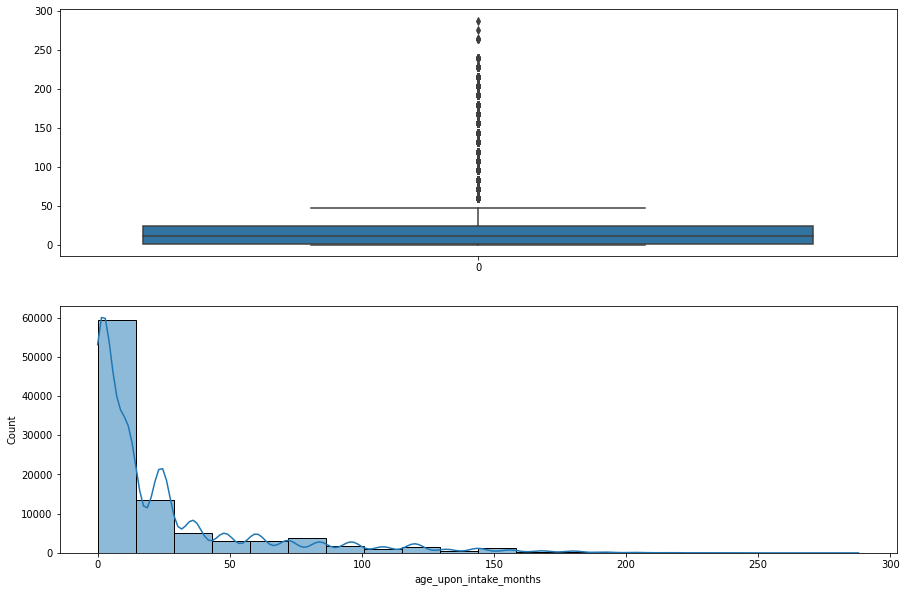

In [126]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.boxplot(data=df[df.days_in_shelter.between(0,60)].age_upon_intake_months,\
            ax = axs[0])

sns.histplot(data = df[df.days_in_shelter.between(0,60)].age_upon_intake_months,\
             ax = axs[1], bins = 20, kde = True)
plt.show()

## Correlation between features

### For Dogs

In [104]:
df_dogs = df[df['Animal Type'] == 'Dog'].copy()
df_dogs.drop(columns = 'Animal Type', inplace = True)
df_dogs.head(2)

,Intake Type,Intake Condition,Breed,days_in_shelter,age_upon_intake_months,neutered_or_spayed_intake,male_or_female_intake,color,day_bins
0,Public Assist,Normal,Mixed,2.0,72.0,1,1.0,Bicolor,"[0,15]"
1,Owner Surrender,Normal,Pure,5.0,120.0,1,1.0,Tricolor,"[0,15]"


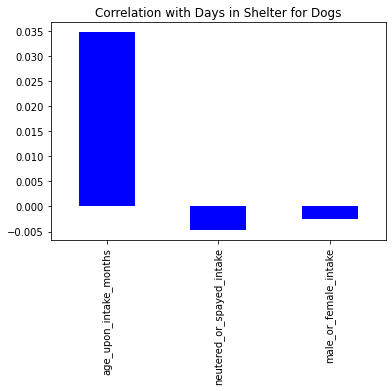

In [114]:
df_dogs_num = df_dogs.select_dtypes(include=['float64','int64']).copy()

numerical_corr = df_dogs_num.corr()
l = list(df_dogs_num.copy())
l.remove('days_in_shelter')
numerical_corr['days_in_shelter'][l].plot.bar(color = 'b');
plt.title('Correlation with Days in Shelter for Dogs');

### For Cats

In [66]:
df_cats = df[df['Animal Type'] == 'Cat'].copy()
df_cats.drop(columns = 'Animal Type', inplace = True)
df_cats.head(2)

,Intake Type,Intake Condition,Breed,days_in_shelter,age_upon_intake_months,neutered_or_spayed_intake,male_or_female_intake,color,day_bins
9,Stray,Normal,Mixed,4.0,192.0,0,0.0,Bicolor,"[0,15]"
10,Stray,Normal,Mixed,15.0,168.0,1,0.0,Bicolor,"[0,15]"


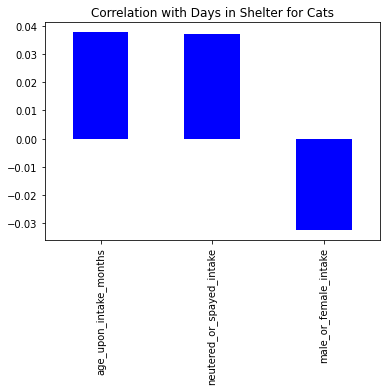

In [113]:
df_cats_num = df_cats.select_dtypes(include=['float64','int64']).copy()

numerical_corr_2 = df_cats_num.corr()
l = list(df_cats_num.copy())
l.remove('days_in_shelter')
numerical_corr_2['days_in_shelter'][l].plot.bar(color = 'b');
plt.title('Correlation with Days in Shelter for Cats');

### Encoding all categorical features   
Categorical features in dataset:   
- Intake Type
- Intake Condition
- Animal Type
- Breed (Binary)
- Colors (too many colors, how to plot them visually?)  

In [68]:
from sklearn.preprocessing import OneHotEncoder

df_cat = df.select_dtypes(include=['object']).copy()

df_cat.drop(columns = 'day_bins', inplace = True)

df_ohe = df.select_dtypes(include=['float64','int64']).copy()

for column in df_cat.columns:
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(df[[column]]) # Fit the encoder
    
    column_encoded = ohe.transform(df[[column]]) # Encode the feature
    
    for i in range(len(ohe.get_feature_names())):
        df_ohe[ohe.get_feature_names()[i]] = column_encoded.T[i]

df_ohe.head(2)

,days_in_shelter,age_upon_intake_months,neutered_or_spayed_intake,male_or_female_intake,x0_Abandoned,x0_Euthanasia Request,x0_Owner Surrender,x0_Public Assist,x0_Stray,x0_Aged,...,x0_Pregnant,x0_Sick,x0_Cat,x0_Dog,x0_Mixed,x0_Pure,x0_Bicolor,x0_Dark,x0_Light,x0_Tricolor
0,2.0,72.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,5.0,120.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [56]:
corr_dogs = df_ohe[df_ohe.x0_Dog == 1].corr() # Pearson Correlation

In [57]:
corr_df = corr_dogs.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df[(corr_df['correlation'] >= 0.5) | (corr_df['correlation'] <= -0.5)]

,feature_1,feature_2,correlation
223,x0_Stray,x0_Public Assist,-0.523901
197,x0_Public Assist,x0_Stray,-0.523901
698,x0_Light,x0_Bicolor,-0.530626
646,x0_Bicolor,x0_Light,-0.530626
671,x0_Dark,x0_Bicolor,-0.638202
645,x0_Bicolor,x0_Dark,-0.638202
390,x0_Normal,x0_Injured,-0.653715
338,x0_Injured,x0_Normal,-0.653715
170,x0_Owner Surrender,x0_Stray,-0.758911
222,x0_Stray,x0_Owner Surrender,-0.758911


In [108]:
corrs

,days_in_shelter,age_upon_intake_months,neutered_or_spayed_intake,male_or_female_intake
days_in_shelter,1.000000,0.021341,0.003054,-0.018016
age_upon_intake_months,0.021341,1.000000,0.524019,0.012892
neutered_or_spayed_intake,0.003054,0.524019,1.000000,0.017385
male_or_female_intake,-0.018016,0.012892,0.017385,1.000000


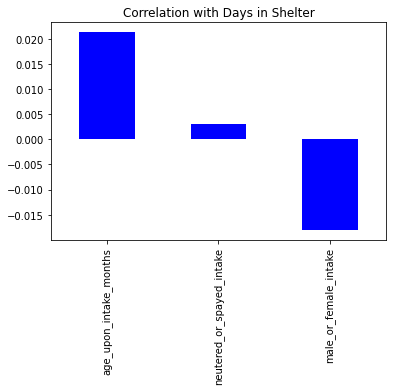

In [39]:
corrs[(corrs.days_in_shelter > 0.02) | (corrs.days_in_shelter < -0.02)]

,days_in_shelter,age_upon_intake_months,age_upon_outcome_months,neutered_or_spayed_outcome,male_or_female_outcome,neutered_or_spayed_intake,male_or_female_intake,x0_Abandoned,x0_Euthanasia Request,x0_Owner Surrender,...,x0_Euthanasia,x0_Missing,x0_Relocate,x0_Return to Owner,x0_Rto-Adopt,x0_Transfer,x0_Bicolor,x0_Dark,x0_Light,x0_Tricolor
days_in_shelter,1.000000,0.021341,0.045186,0.213529,-0.018016,0.003054,-0.018016,0.007313,-0.015264,0.056817,...,-0.039563,0.018743,-0.001212,-0.164398,-0.003708,-0.163414,0.005691,0.012589,-0.035241,0.007347
age_upon_intake_months,0.021341,1.000000,0.998769,0.149238,0.012892,0.524019,0.012892,-0.012660,0.103251,0.110863,...,0.113538,-0.007707,0.000743,0.300372,0.033144,-0.104861,0.030029,-0.066856,0.067602,-0.017534
age_upon_outcome_months,0.045186,0.998769,1.000000,0.154282,0.012337,0.522983,0.012337,-0.012709,0.102357,0.110579,...,0.112018,-0.007257,0.000679,0.296979,0.034049,-0.109329,0.029715,-0.066072,0.066952,-0.017560
neutered_or_spayed_outcome,0.213529,0.149238,0.154282,1.000000,0.018932,0.375758,0.018932,0.002644,-0.005817,0.141774,...,-0.147280,-0.021437,0.003036,-0.009400,0.033242,-0.514678,0.071925,-0.077619,0.006858,-0.009307
x0_Owner Surrender,0.056817,0.110863,0.110579,0.141774,-0.030094,0.188917,-0.030094,-0.021612,-0.020878,1.000000,...,0.003147,-0.001470,-0.001971,-0.142767,0.018589,-0.015897,0.000958,-0.012991,-0.000872,0.021655
x0_Public Assist,-0.020149,0.118876,0.118129,0.010196,0.031110,0.134776,0.031110,-0.011904,-0.011499,-0.109857,...,-0.012564,-0.003947,-0.001085,0.344242,0.004147,-0.096774,0.033940,-0.030604,0.020029,-0.033816
x0_Stray,-0.038437,-0.174172,-0.173402,-0.131145,0.009502,-0.245726,0.009502,-0.089082,-0.086054,-0.822122,...,-0.017310,0.003739,0.002397,-0.060672,-0.018673,0.069922,-0.019499,0.028418,-0.010838,-0.000078
x0_Injured,0.021063,0.060146,0.060042,-0.061812,0.026387,0.010922,0.026387,-0.010209,0.003574,-0.056069,...,0.238738,-0.003464,-0.001015,-0.022485,0.009756,-0.019226,-0.014310,0.019238,0.007909,-0.015208
x0_Normal,-0.023265,-0.045901,-0.045526,0.172278,-0.012495,0.038231,-0.012495,-0.010635,-0.075052,0.051253,...,-0.251359,-0.000105,0.001656,0.074806,-0.004626,-0.075999,0.039656,-0.048631,-0.001230,0.010638
x0_Nursing,0.024910,-0.111945,-0.111975,-0.141589,-0.010234,-0.096744,-0.010234,0.027495,-0.008572,-0.043729,...,-0.020226,0.005120,-0.000809,-0.068867,-0.013143,0.114549,-0.037425,0.045362,-0.013392,0.007351


In [53]:
df_ohe

,days_in_shelter,age_upon_intake_months,neutered_or_spayed_intake,male_or_female_intake,x0_Abandoned,x0_Euthanasia Request,x0_Owner Surrender,x0_Public Assist,x0_Stray,x0_Aged,...,x0_Pregnant,x0_Sick,x0_Cat,x0_Dog,x0_Mixed,x0_Pure,x0_Bicolor,x0_Dark,x0_Light,x0_Tricolor
0,2.0,72.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,5.0,120.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,192.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,180.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,180.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110852,2.0,24.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
110853,2.0,24.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
110861,1.0,24.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
110874,2.0,12.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


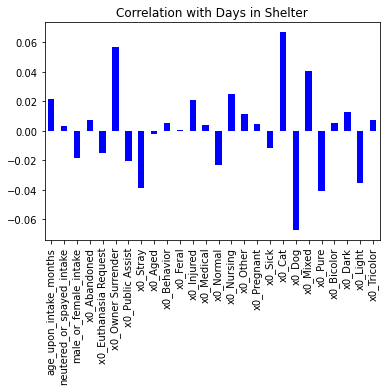

In [54]:
corrs = df_ohe.corr()
l = list(df_ohe)
l.remove('days_in_shelter')
corrs['days_in_shelter'][l].plot.bar(color = 'b');
plt.title('Correlation with Days in Shelter');

In [62]:
(corrs[(corrs.days_in_shelter > 0.02) | (corrs.days_in_shelter < -0.02)])[['days_in_shelter']].sort_values(by = 'days_in_shelter', ascending = False)

,days_in_shelter
days_in_shelter,1.000000
x0_Adoption,0.292317
neutered_or_spayed_outcome,0.213529
x0_Cat,0.067011
x0_Owner Surrender,0.056817
age_upon_outcome_months,0.045186
x0_Mixed,0.040555
x0_Nursing,0.024910
age_upon_intake_months,0.021341
x0_Injured,0.021063


## Evaluation Metric   
At this moment, we are going to evaluate our model with RMSE.

In [196]:
def compute_rmse(y_pred, y_true):
    return np.sqrt(((y_pred - y_true)**2).mean())

## Baseline Model   
- Baseline Model with RMSE and utilizing the mean as prediction
- Generate predictions based on a simple heuristic
- Evaluate the RMSE for these predictions

In [198]:
df['y_pred'] = df['days_in_shelter'].mean()

#RMSE
compute_rmse(df['y_pred'], df['days_in_shelter'])

42.65241520991277